In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
train_df=pd.read_csv("Google_Stock_Price_Train.csv")
dataset_total = train_df.iloc[:, 1:2]
dataset_train = train_df.iloc[:, 1:2]
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [2]:
train_dataset=train_df.copy()
train_df=train_df.iloc[:, 1:2]
train_df.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc=MinMaxScaler(feature_range=(0, 1))
train_df=sc.fit_transform(train_df)

In [4]:
X_train=[]
y_train=[]

for i in range(60, len(train_df)):
    X_train.append(train_df[i-60:i, 0])
    y_train.append(train_df[i, 0])

In [5]:
X_train, y_train=np.array(X_train), np.array(y_train)
print(X_train.shape[0], X_train.shape[1])

1198 60


In [6]:
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)

(1198, 60, 1) (1198,)


In [7]:
from keras.layers import Dense, Flatten, Dropout
from keras.layers import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [8]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))),
model.add(Dropout(0.2)),

model.add(LSTM(units=50, return_sequences=True)),
model.add(Dropout(0.2)),

model.add(LSTM(units=50, return_sequences=True)),
model.add(Dropout(0.2)),

model.add(LSTM(units=50)),
model.add(Dropout(0.2)),

model.add(Dense(units=1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [10]:
model.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[1])

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0755
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0111
Epoch 3/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0063
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0021
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0021
Epoch 100/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0020


In [11]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
# dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# dataset_train = dataset_total.iloc[:, 1:2]
real_stock_price = dataset_test.iloc[:, 1:2].values

In [12]:
len(dataset_total) - len(dataset_test) - 60

1178

In [13]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs.shape

(80,)

In [14]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

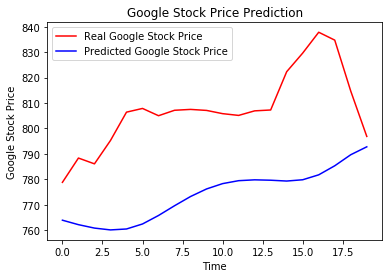

In [15]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()